In [20]:
import pickle as pkl
import ast
import matplotlib.pyplot as plt

In [21]:
with open("./results-exp1-detr.pkl", "rb") as file:
    results = pkl.load(file)

print(results)

{'alpha-[0.03, 0.1, 0.1]-mix_box_count_threshold_pixelwise_lac_additive': <cods.od.data.predictions.ODResults object at 0x79b5853c3dd0>, 'alpha-[0.03, 0.1, 0.1]-mix_box_count_threshold_pixelwise_lac_multiplicative': <cods.od.data.predictions.ODResults object at 0x79b5844cd910>, 'alpha-[0.03, 0.1, 0.1]-mix_box_count_threshold_pixelwise_aps_additive': <cods.od.data.predictions.ODResults object at 0x79b57fcb19d0>, 'alpha-[0.03, 0.1, 0.1]-mix_box_count_threshold_pixelwise_aps_multiplicative': <cods.od.data.predictions.ODResults object at 0x79b5ad596d10>, 'alpha-[0.03, 0.1, 0.1]-mix_box_count_threshold_boxwise_lac_additive': <cods.od.data.predictions.ODResults object at 0x79b584e16d90>, 'alpha-[0.03, 0.1, 0.1]-mix_box_count_threshold_boxwise_lac_multiplicative': <cods.od.data.predictions.ODResults object at 0x79b5ad596f50>, 'alpha-[0.03, 0.1, 0.1]-mix_box_count_threshold_boxwise_aps_additive': <cods.od.data.predictions.ODResults object at 0x79b584e17a10>, 'alpha-[0.03, 0.1, 0.1]-mix_box_cou

In [22]:
for key, value in results.items():
    print(f"Key: {key}")
    print("  Confidence Metrics:")
    print(f"    Set Size: {value.confidence_set_sizes.mean()}")
    print(f"    Risk: {value.confidence_coverages.mean()}")
    print("  Localization Metrics:")
    print(f"    Set Size: {value.localization_set_sizes.mean()}")
    print(f"    Risk: {value.localization_coverages.mean()}")
    print("  Classification Metrics:")
    print(f"    Set Size: {value.classification_set_sizes.mean()}")
    print(f"    Risk: {value.classification_coverages.mean()}")
    print(f"  Global Risk: {value.global_coverage.mean()}")
    print("-" * 50)

Key: alpha-[0.03, 0.1, 0.1]-mix_box_count_threshold_pixelwise_lac_additive
  Confidence Metrics:
    Set Size: 19.011999130249023
    Risk: 0.04560000076889992
  Localization Metrics:
    Set Size: 1.2032889127731323
    Risk: 0.098799929022789
  Classification Metrics:
    Set Size: 1.9144333600997925
    Risk: 0.08471346646547318
  Global Risk: 0.15380452573299408
--------------------------------------------------
Key: alpha-[0.03, 0.1, 0.1]-mix_box_count_threshold_pixelwise_lac_multiplicative
  Confidence Metrics:
    Set Size: 19.011999130249023
    Risk: 0.04560000076889992
  Localization Metrics:
    Set Size: 1.151739239692688
    Risk: 0.09961869567632675
  Classification Metrics:
    Set Size: 1.9144333600997925
    Risk: 0.08471346646547318
  Global Risk: 0.15721429884433746
--------------------------------------------------
Key: alpha-[0.03, 0.1, 0.1]-mix_box_count_threshold_pixelwise_aps_additive
  Confidence Metrics:
    Set Size: 19.011999130249023
    Risk: 0.04560000076

In [23]:
import pandas as pd

# Create a list to store the data for the DataFrame
data = []

# Iterate through the results dictionary
for key, value in results.items():
    data.append(
        {
            "Key": key,
            "Confidence Set Size (Mean)": value.confidence_set_sizes.mean(),
            "Confidence Risk (Mean)": value.confidence_coverages.mean(),
            "Localization Set Size (Mean)": value.localization_set_sizes.mean(),
            "Localization Risk (Mean)": value.localization_coverages.mean(),
            "Classification Set Size (Mean)": value.classification_set_sizes.mean(),
            "Classification Risk (Mean)": value.classification_coverages.mean(),
            "Global Risk (Mean)": value.global_coverage.mean(),
        }
    )

# Create a DataFrame from the data
df = pd.DataFrame(data)

# # Display the DataFrame
# print(df)

In [24]:
metrics = [
    "Global Risk (Mean)",
    "Confidence Set Size (Mean)",
    "Confidence Risk (Mean)",
    "Localization Set Size (Mean)",
    "Localization Risk (Mean)",
    "Classification Set Size (Mean)",
    "Classification Risk (Mean)",
]

for metric in metrics:
    df[metric] = df[metric].apply(lambda x: float(x.item()))

/tmp/ipykernel_732050/2698203354.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()


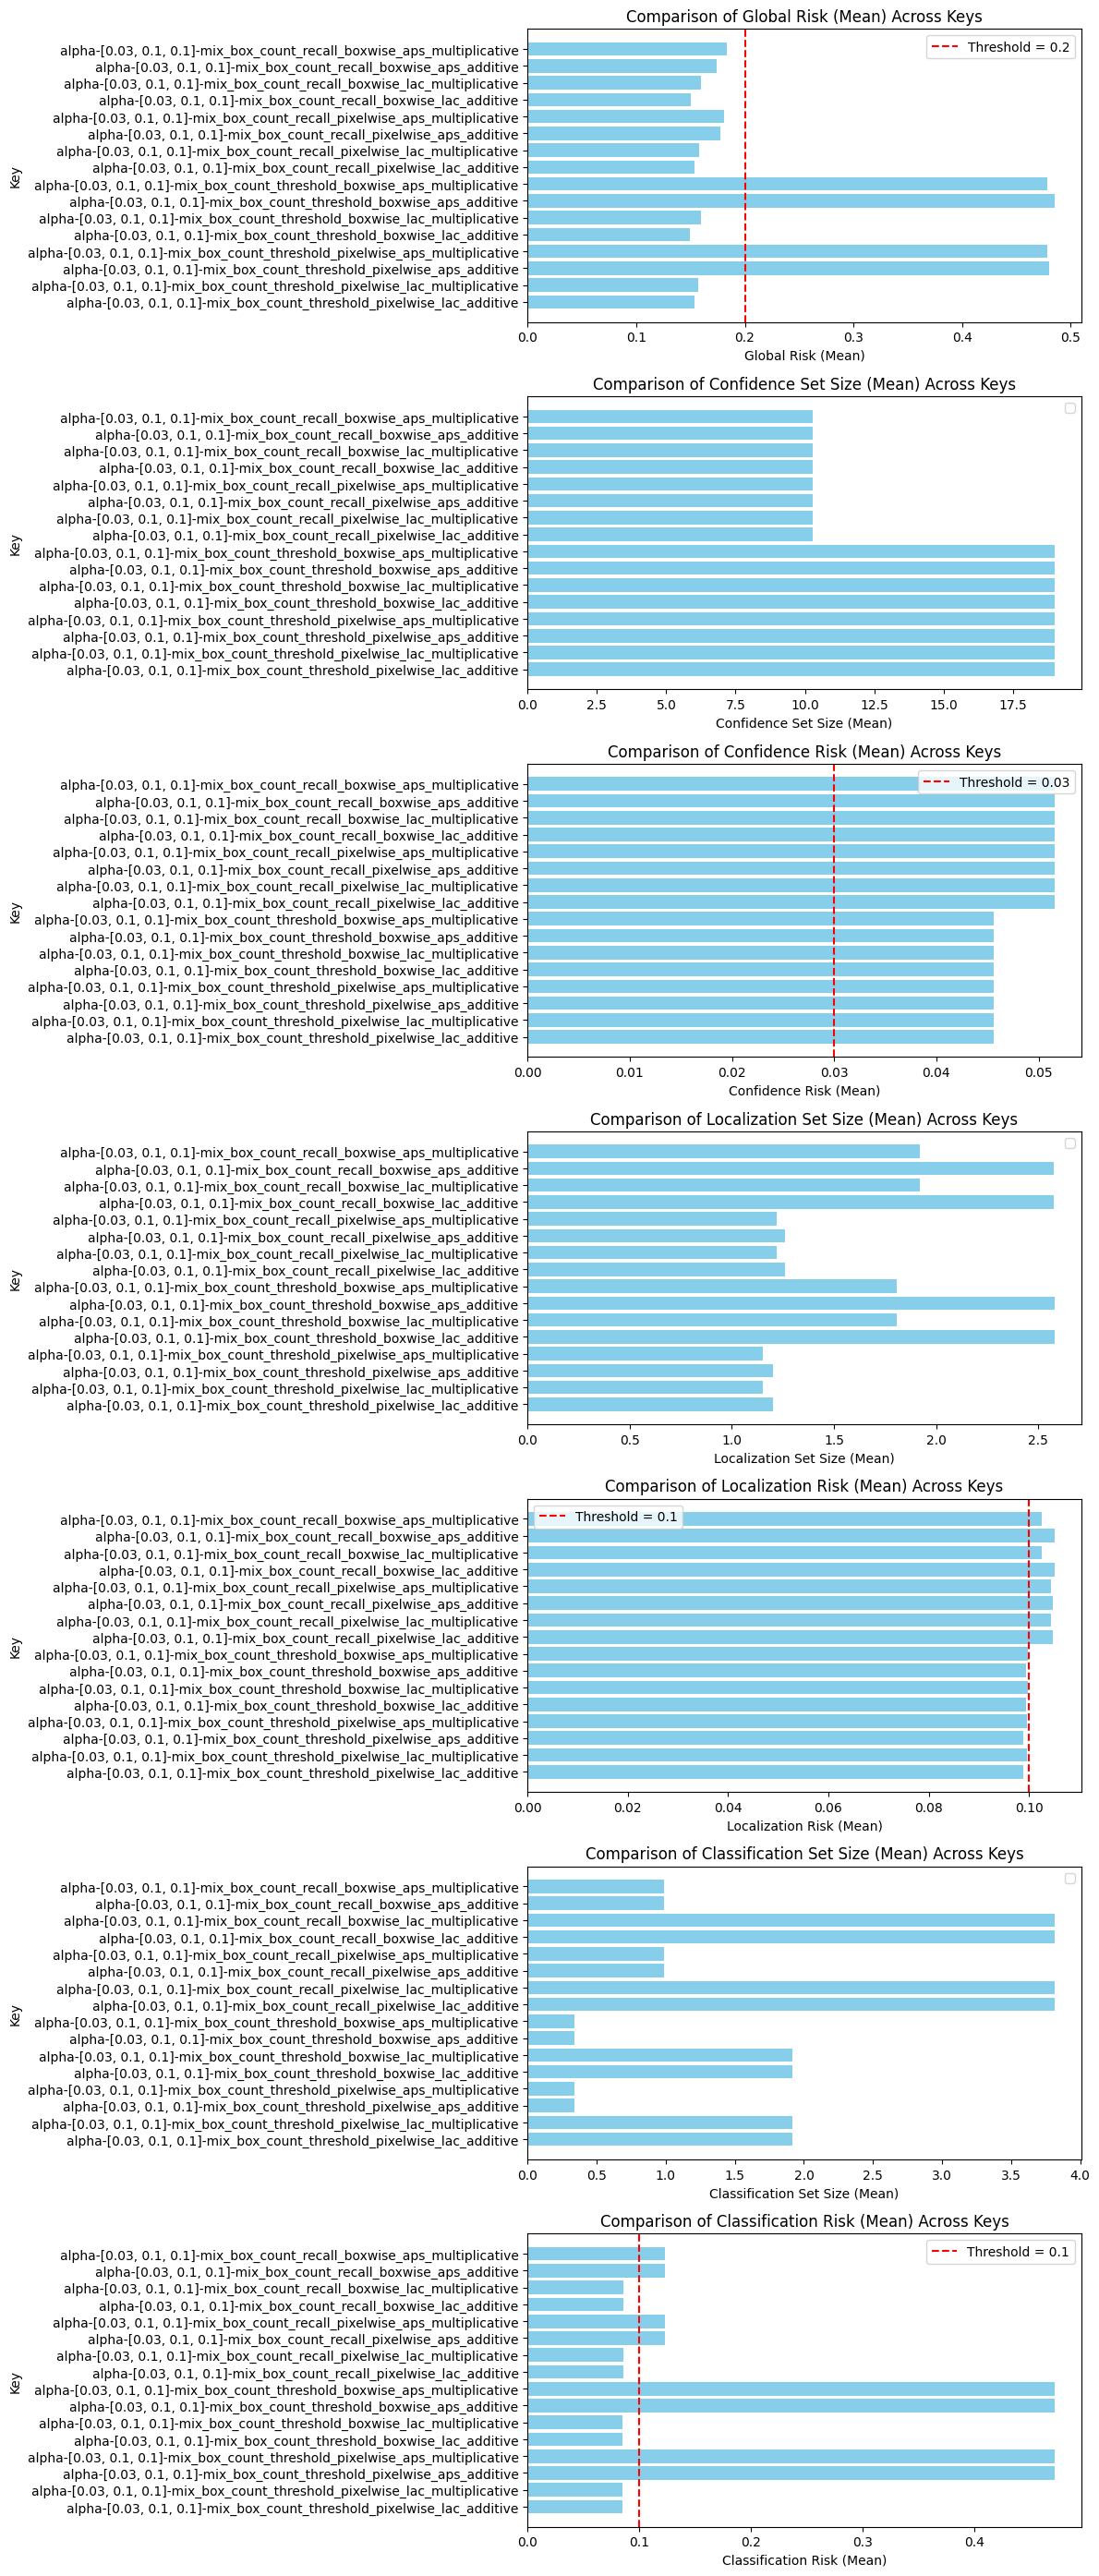

In [31]:
metrics = [
    "Global Risk (Mean)",
    "Confidence Set Size (Mean)",
    "Confidence Risk (Mean)",
    "Localization Set Size (Mean)",
    "Localization Risk (Mean)",
    "Classification Set Size (Mean)",
    "Classification Risk (Mean)",
]


# Plot each metric
fig, axes = plt.subplots(
    len(metrics),
    1,
    figsize=(12, 4 * len(metrics)),  # , sharex=True
)

for i, metric in enumerate(metrics):
    axes[i].barh(df["Key"], df[metric], color="skyblue")
    axes[i].set_title(f"Comparison of {metric} Across Keys")
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel("Key")
    if "Set Size" not in metric:
        alphas = df["Key"].tolist()[0].split("-")[1]
        alphas = ast.literal_eval(alphas)
        if "Global" in metric:
            alpha = sum(alphas[1:])
        elif "Confidence" in metric:
            alpha = alphas[0]
        elif "Localization" in metric:
            alpha = alphas[1]
        elif "Classification" in metric:
            alpha = alphas[2]
        axes[i].axvline(
            x=alpha, color="red", linestyle="--", label=f"Threshold = {alpha}"
        )
    axes[i].legend()

plt.tight_layout()
plt.show()